# Descrição das variáveis

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Instalação e importação das bibliotecas

In [48]:
%pip install pandas
%pip install xlrd
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Leitura e manipulação do banco de dados e dos dados

In [49]:
# Inicialmente o dataset é baixado em arquivo .xls. Dataset é lido e transformado em arquivo .csv para facilitar.
# Ignora-se a primeira linha de cabeçalho (X1, X2, X3, ... X23, Y)
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)
df.to_csv('default_of_credit_card_clients.csv', index=None, header=True)

In [50]:
# Transformar variáveis de cunho categóricas representadas no dataframe por números inteiros para tipo qualitativo.
df['SEX'] = df['SEX'].map({1: 'Masculino', 2: 'Feminino'})
df['EDUCATION'] = df['EDUCATION'].map({1: 'Pós Graduação', 2: 'Ensino Superior', 3: 'Ensino médio', 4: 'Outros'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Casado', 2: 'Solteiro', 3: 'Outros'})

df['PAY_0'] = df['PAY_0'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})
df['PAY_2'] = df['PAY_2'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})
df['PAY_3'] = df['PAY_3'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})
df['PAY_4'] = df['PAY_4'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})
df['PAY_5'] = df['PAY_5'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})
df['PAY_6'] = df['PAY_6'].map({-2: 'Sem fatura', -1: 'Pagamento em dia', 0: 'Em dia (crédito rotativo)', 1: 'Atraso de 1 mês', 2: 'Atraso de 2 mês', 3: 'Atraso de 3 mês', 4: 'Atraso de 4 mês', 5: 'Atraso de 5 mês', 6: 'Atraso de 6 mês', 7: 'Atraso de 7 mês', 8: 'Atraso de 8 mês', 9: 'Atraso de 9 meses ou mais'})


# VISUALIZAÇÃO E EXPLORAÇÃO DE DADOS - EDA - PARTE1

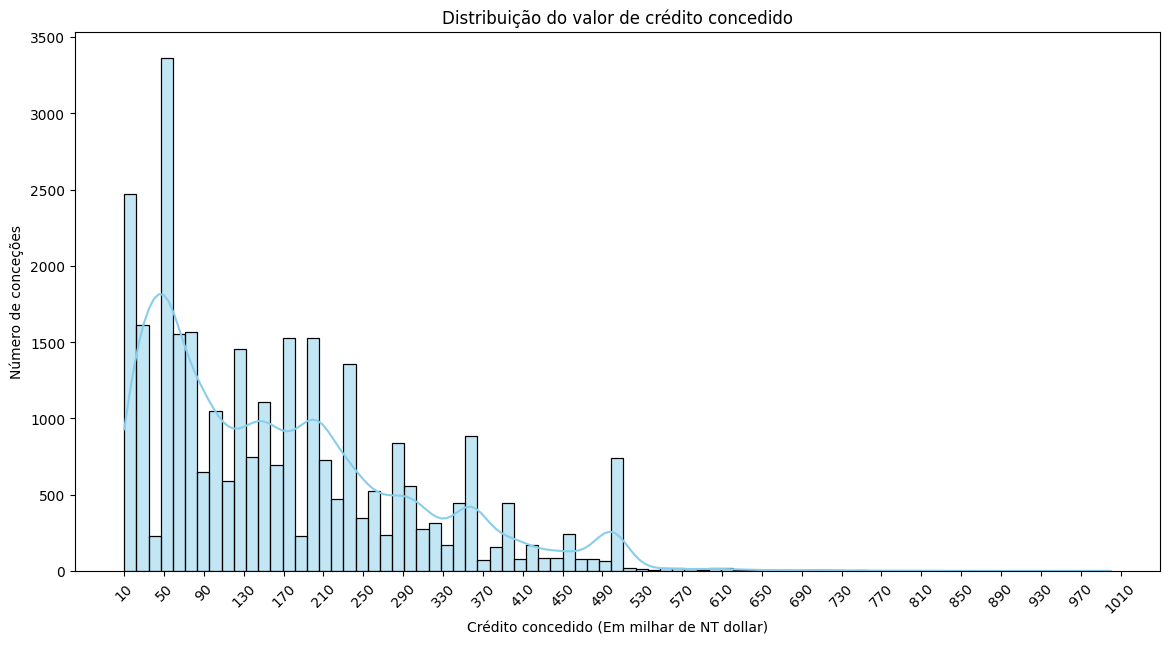

A princípio, crédito concedido em grande maioria até meio milhão


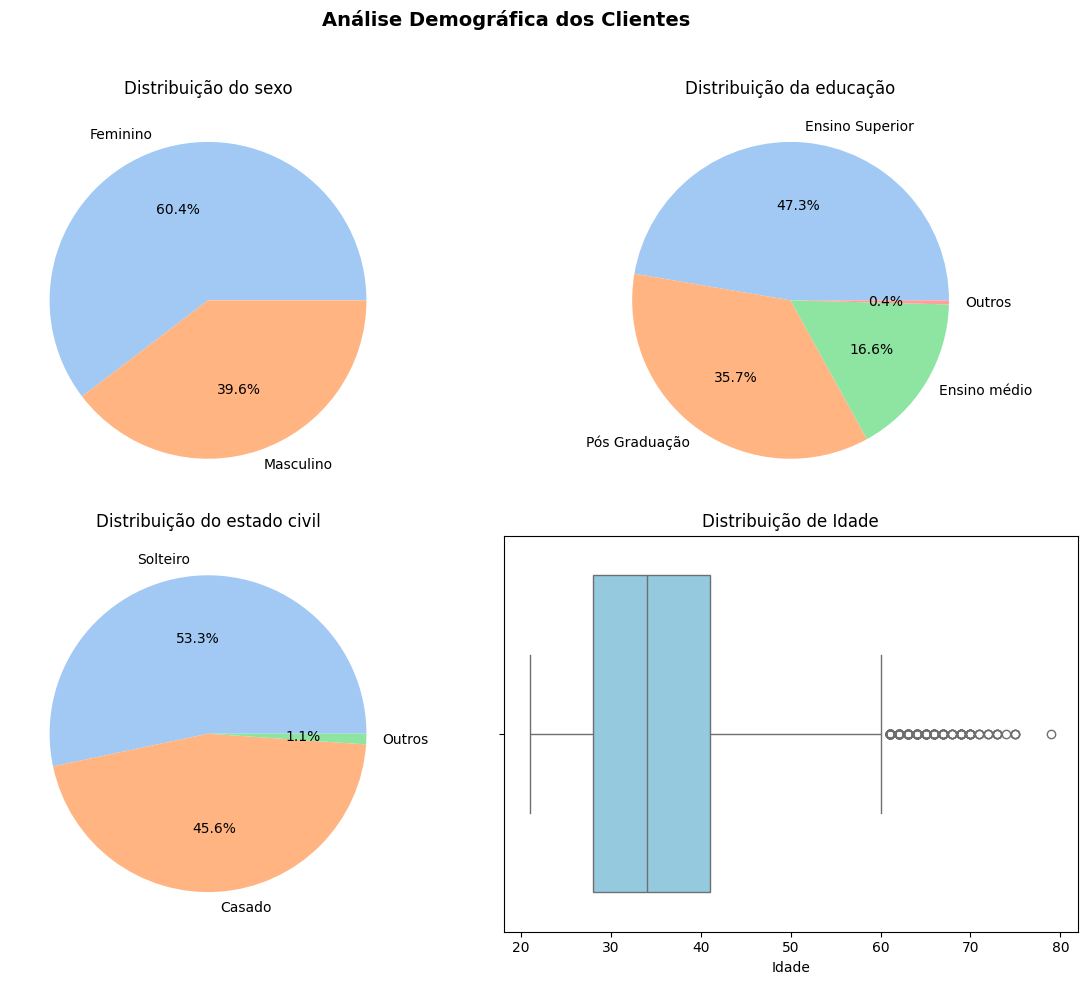

Pouco a comentar / concluir quanto ao sexo, educação e estado civil
Idade concentrada entre 27 e 41 anos


C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\138078367.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j, bottom[j] + v/2, f"{v*100:.1f}%", ha='center', va='center', fontsize=8)


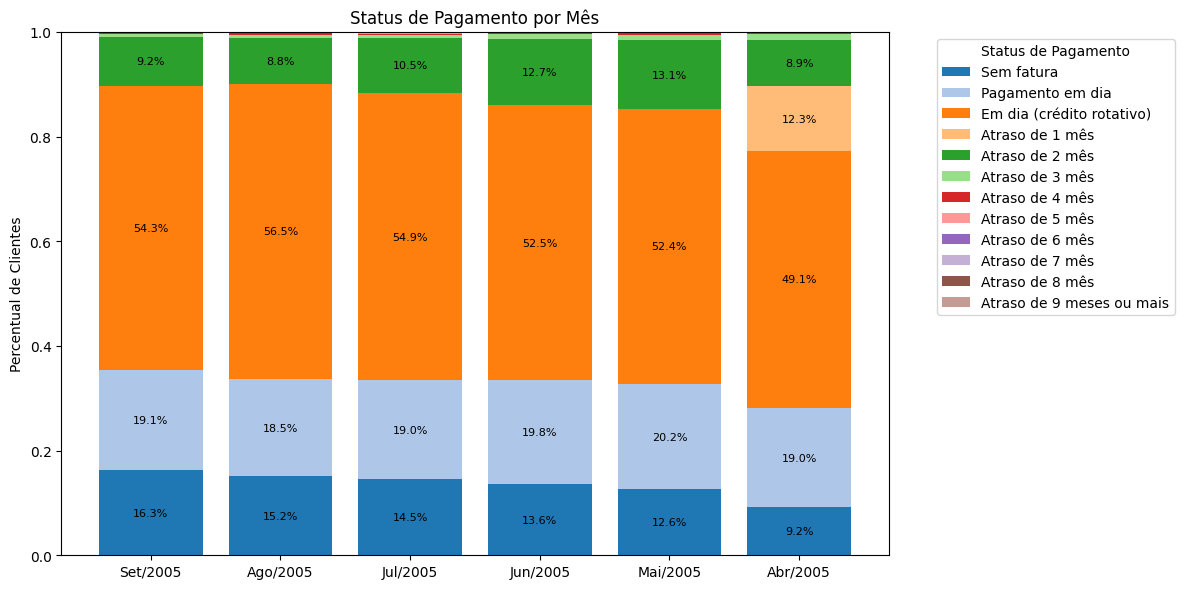

A grande maioria dos pagamentos é sem atraso ou inexistente devio a ausência de fatura naquele mês. 
Contudo, percebe-se que quando há atraso, geralmente o atraso é de poucos meses.


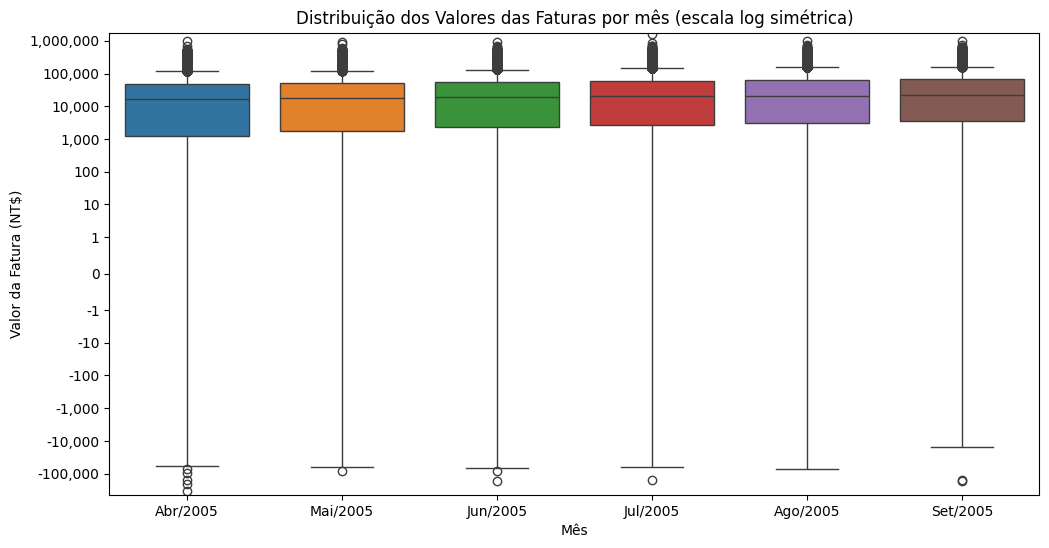

O valor das faturas mensais se concentra entre 1000 e 100.000.
Além disso, há outliers de grandes faturas e de valores negativos que podem ser explicados como extornos ao cliente.


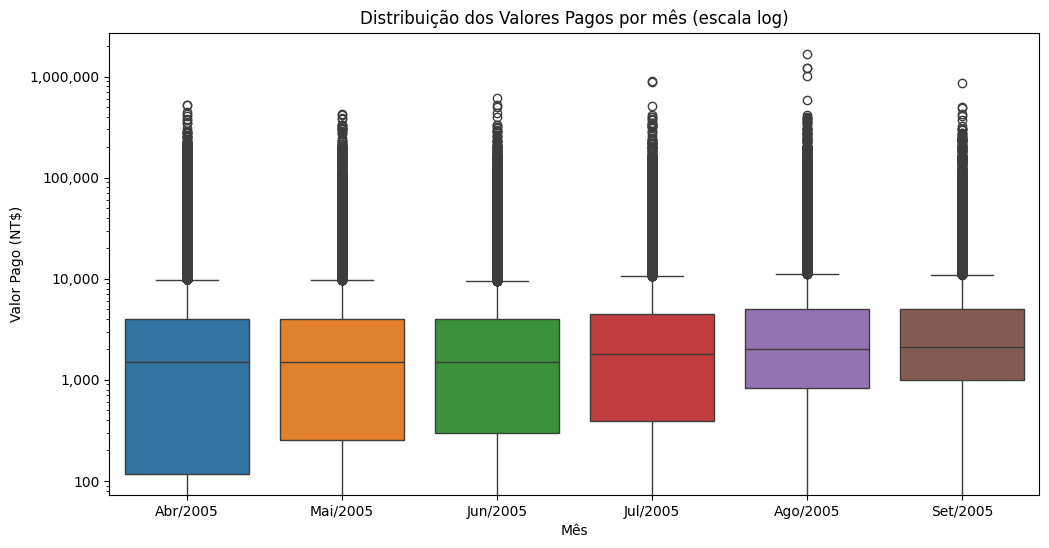

O pagamentos das faturas concentram-se em pagamentos até 7500.
Além disso, percebe-se um padrão que tanto o valor das faturas quanto seus pagamentos tendem assumir valores mínimos maiores conforme os meses de 2005 se sucedem.


In [51]:
# X1

x = df['LIMIT_BAL']

plt.figure(figsize=(14,7))
sns.histplot(
    x=x,
    bins='auto',       
    kde=True,
    edgecolor='black',
    color='skyblue',
    stat='count'
)

plt.title("Distribuição do valor de crédito concedido")
plt.xlabel("Crédito concedido (Em milhar de NT dollar)")
plt.ylabel("Número de conceções")

ax = plt.gca()
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda val, pos: f'{int(val/1000)}'))

ticks = np.arange(x.min(), x.max() + 10001, 40000)
ax.set_xticks(ticks)

plt.xticks(rotation=45)
plt.show()

print('A princípio, crédito concedido em grande maioria até meio milhão')



# X2, X3, X4, X5

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle("Análise Demográfica dos Clientes", fontsize=14, fontweight='bold')

# SEX
contagem_sex = df['SEX'].value_counts()
axes[0, 0].pie(
    contagem_sex.values, 
    labels=contagem_sex.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel")
)
axes[0, 0].set_title("Distribuição do sexo")

# EDUCATION
contagem_education = df['EDUCATION'].value_counts()
axes[0, 1].pie(
    contagem_education.values, 
    labels=contagem_education.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel")
)
axes[0, 1].set_title("Distribuição da educação")

# MARRIAGE 
contagem_marriage = df['MARRIAGE'].value_counts()
axes[1, 0].pie(
    contagem_marriage.values, 
    labels=contagem_marriage.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel")
)
axes[1, 0].set_title("Distribuição do estado civil")

# AGE 
sns.boxplot(x=df['AGE'], ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title("Distribuição de Idade")
axes[1, 1].set_xlabel("Idade")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('Pouco a comentar / concluir quanto ao sexo, educação e estado civil\n' \
'Idade concentrada entre 27 e 41 anos')



# X6 - X11

cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0']

meses = {
    'PAY_0': 'Abr/2005',
    'PAY_2': 'Mai/2005',
    'PAY_3': 'Jun/2005',
    'PAY_4': 'Jul/2005',
    'PAY_5': 'Ago/2005',
    'PAY_6': 'Set/2005'
}

ordem_status = [
    'Sem fatura',
    'Pagamento em dia',
    'Em dia (crédito rotativo)',
    'Atraso de 1 mês',
    'Atraso de 2 mês',
    'Atraso de 3 mês',
    'Atraso de 4 mês',
    'Atraso de 5 mês',
    'Atraso de 6 mês',
    'Atraso de 7 mês',
    'Atraso de 8 mês',
    'Atraso de 9 meses ou mais'
]

percentuais = pd.DataFrame()

for col in cols:
    contagem = df[col].value_counts(normalize=True)
    contagem = contagem.reindex(ordem_status, fill_value=0)
    percentuais[col] = contagem

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(cols))
bottom = np.zeros(len(cols))
cores = plt.cm.tab20.colors

for i, status in enumerate(ordem_status):
    valores = percentuais.loc[status]
    
    ax.bar(x, valores, bottom=bottom, color=cores[i % len(cores)], label=status)

    for j, v in enumerate(valores):
        if v > 0.02:
            ax.text(j, bottom[j] + v/2, f"{v*100:.1f}%", ha='center', va='center', fontsize=8)
    
    bottom += valores

ax.set_xticks(x)
ax.set_xticklabels([meses[col] for col in cols])
ax.set_ylim(0, 1)
ax.set_ylabel("Percentual de Clientes")
ax.set_title("Status de Pagamento por Mês")
ax.legend(title="Status de Pagamento", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print('A grande maioria dos pagamentos é sem atraso ou inexistente devio a ausência de fatura naquele mês. \n' \
'Contudo, percebe-se que quando há atraso, geralmente o atraso é de poucos meses.')



# X12 - X17

cols = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']

meses = ['Abr/2005','Mai/2005','Jun/2005','Jul/2005','Ago/2005','Set/2005']

df_faturas = df[cols]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_faturas)

plt.xticks(ticks=range(len(cols)), labels=meses)
plt.yscale('symlog', linthresh=1)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.title("Distribuição dos Valores das Faturas por mês (escala log simétrica)")
plt.ylabel("Valor da Fatura (NT$)")
plt.xlabel("Mês")
plt.show()

print('O valor das faturas mensais se concentra entre 1000 e 100.000.\n' \
'Além disso, há outliers de grandes faturas e de valores negativos que podem ser explicados como extornos ao cliente.')



# X18 - X23

cols = ['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1']

meses = ['Abr/2005','Mai/2005','Jun/2005','Jul/2005','Ago/2005','Set/2005']

df_pagamentos = df[cols]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_pagamentos)
plt.yscale("log")
plt.xticks(ticks=range(len(cols)), labels=meses)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.title("Distribuição dos Valores Pagos por mês (escala log)")
plt.ylabel("Valor Pago (NT$)")
plt.xlabel("Mês")
plt.show()

print('O pagamentos das faturas concentram-se em pagamentos até 7500.\n' \
'Além disso, percebe-se um padrão que tanto o valor das faturas quanto seus pagamentos tendem assumir valores mínimos maiores conforme os meses de 2005 se sucedem.')

# VISUALIZAÇÃO E EXPLORAÇÃO DE DADOS - EDA - PARTE2

C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])


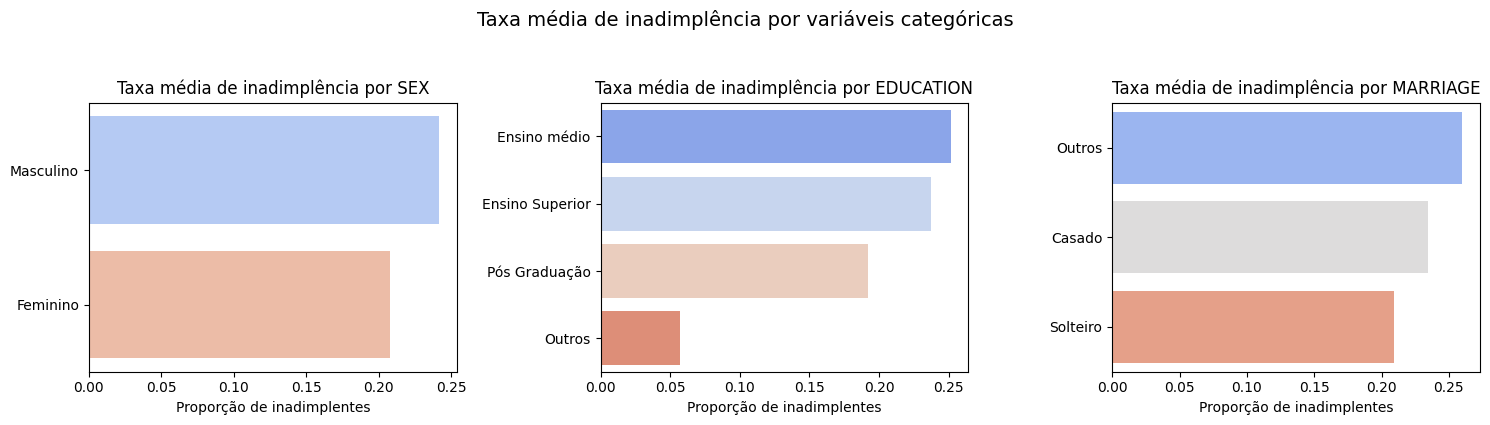

Homens tendem a ser um pouco mais inadimplentes que as mulheres. É difícil encontrar uma relação óbvia quanto ao estado civil e a inadimplência
Porém, percebe-se conforme a escolaridade diminui, a tendência é que o indivíduo seja mais inadimplente.


C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
C:\Users\ABREU\AppData\Local

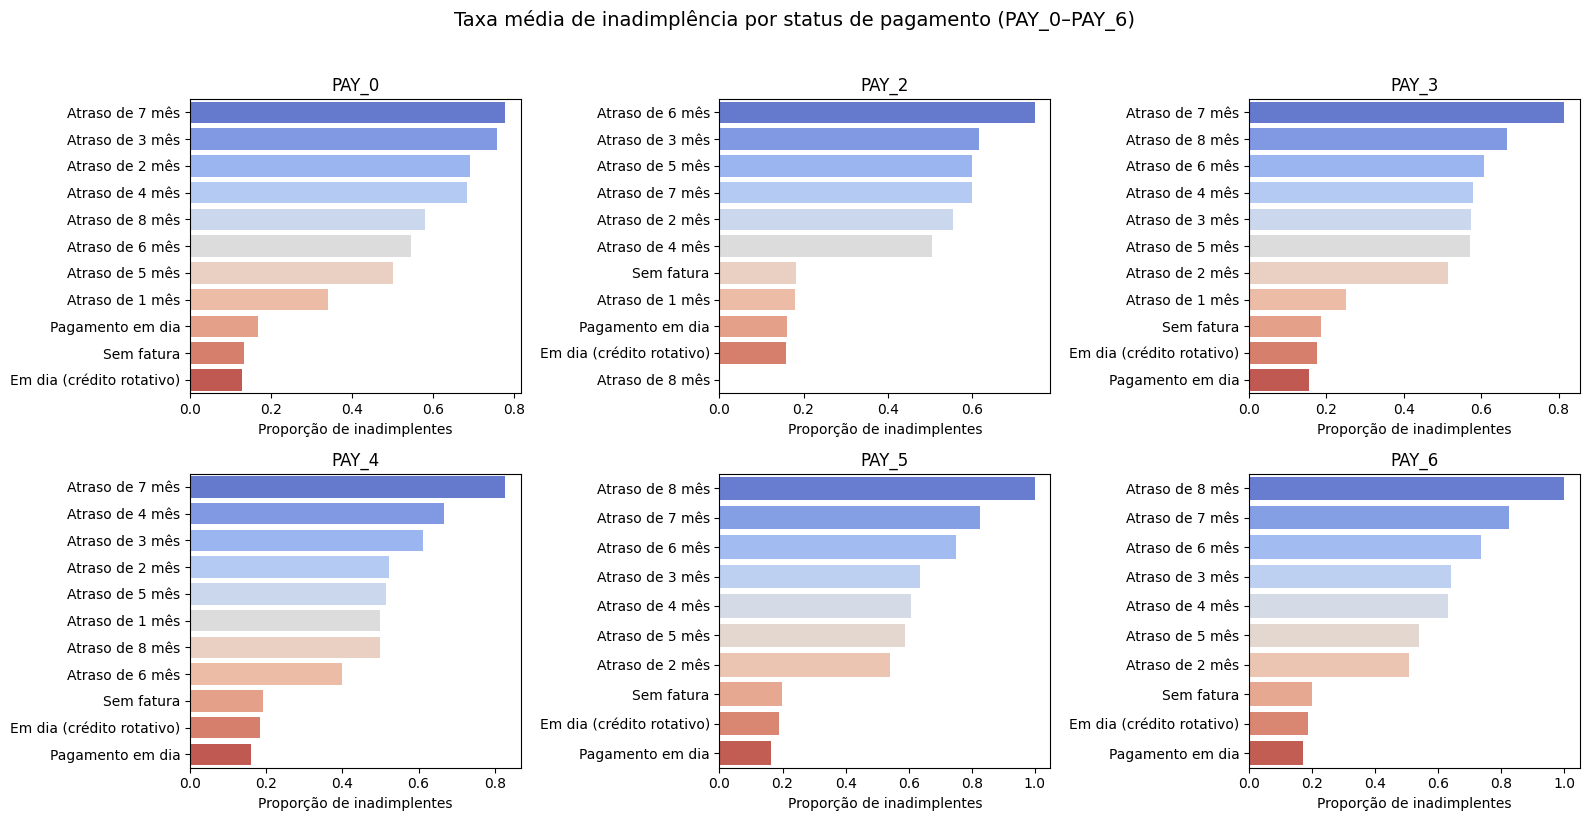

Quanto maior o atraso no pagamento da fatura, maior é a chance do indivíduo ser inadimplente.


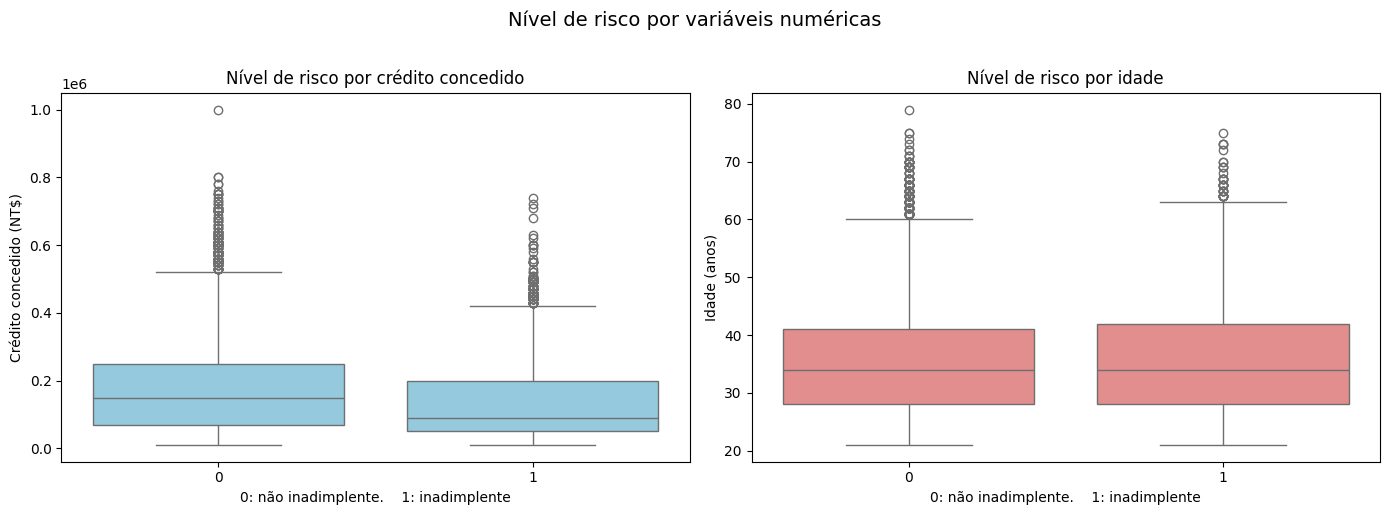

A idade parece não influenciar muito se o indivíduo tende a ser, ou não, inadimplente.
Porém, percebe-se que indivíduos inadimplentes tendem a solicitar empréstimos um pouco menores que indivíduos não inadimplentes.


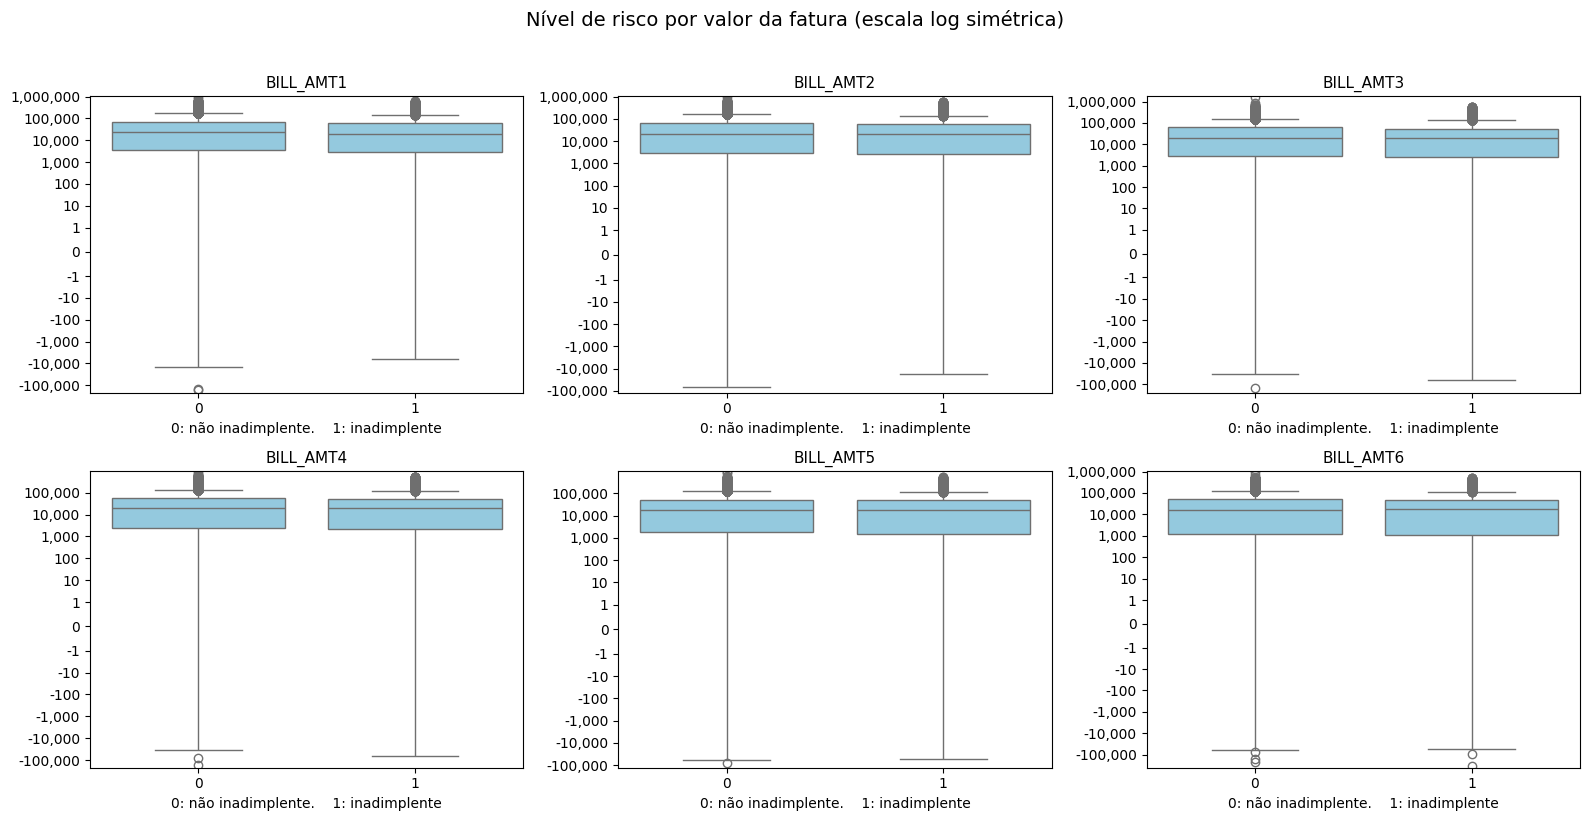

O valor das faturas parece não influenciar se o indivíduo pagará ou não.


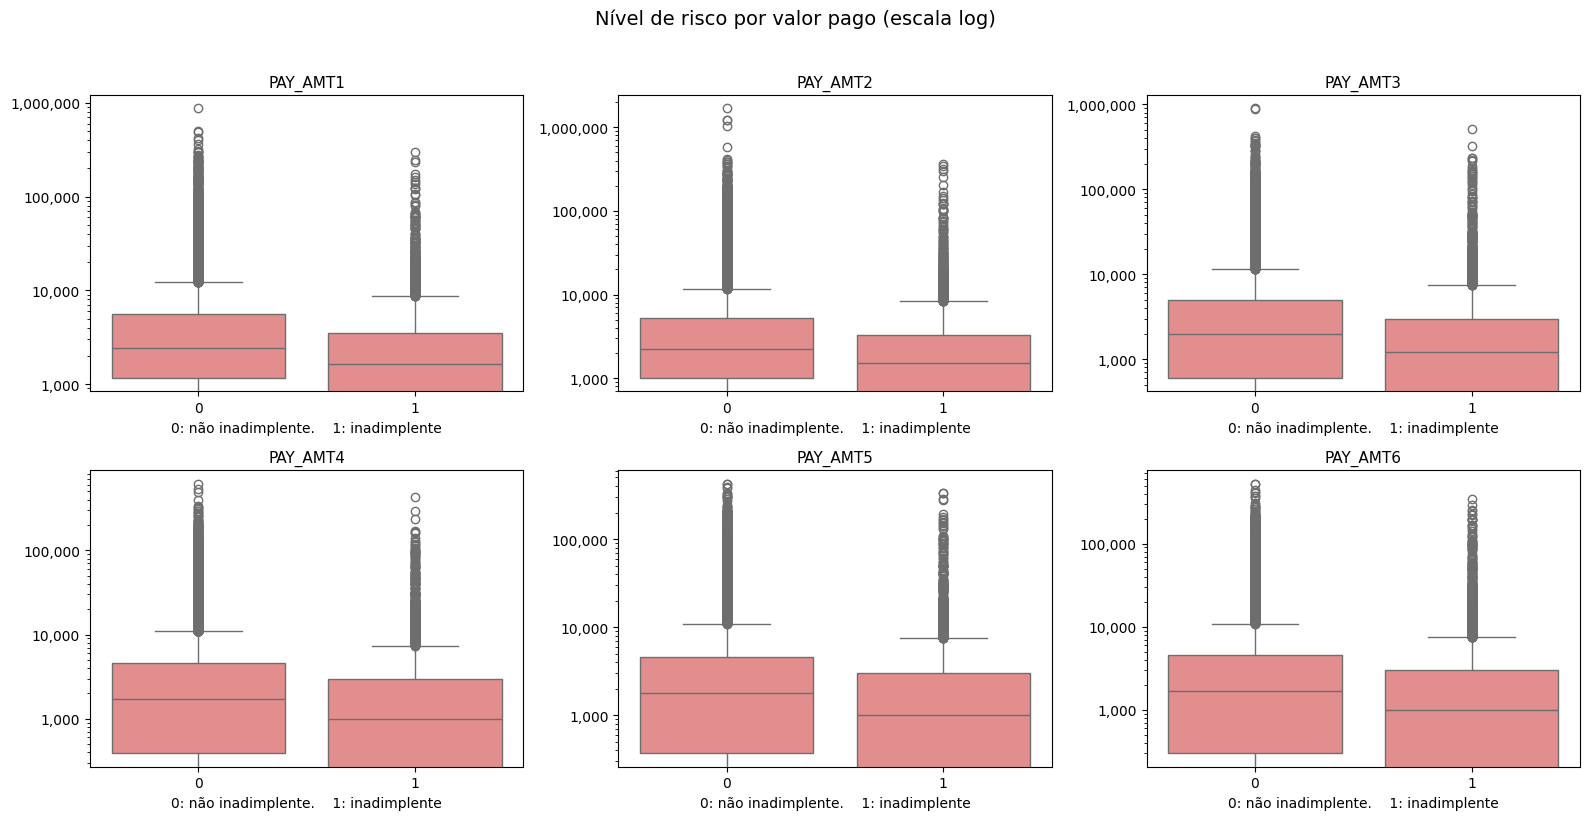

Contudo, indivíduos inadimplenetes tendem a realizar pagamentos menores para quitar suas faturas.


C:\Users\ABREU\AppData\Local\Temp\ipykernel_5844\439118429.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


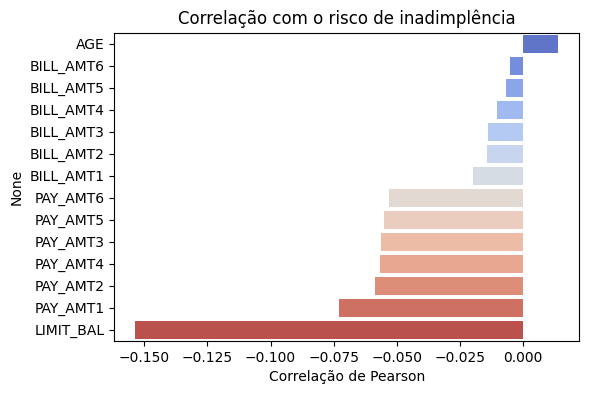

As variáveis numéricas que mais se correlacionam com o risco de inadimplência são: O valor do crédito requisitado e os pagamentos mensais das faturas.

Dessa forma, um resumo rápido e não técnico mostra que 
homens com menor escolaridade que solicitam empréstimos em valores mais baixos e que a cada fatura, atrasam o pagamento e pagam valores menores mostram-se o ser o perfil mais inadimplente.


In [52]:
# TAXA MÉDIA DE INADIMPLÊNCIA POR VARIÁVEL CATEGORICA

# SEX, EDUCATION, MARRIAGE

categoricas_simples = ['SEX', 'EDUCATION', 'MARRIAGE']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()

for i, col in enumerate(categoricas_simples):
    taxa = df.groupby(col)['default payment next month'].mean().sort_values(ascending=False)
    sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Taxa média de inadimplência por {col}')
    axes[i].set_xlabel('Proporção de inadimplentes')
    axes[i].set_ylabel('')

fig.suptitle('Taxa média de inadimplência por variáveis categóricas', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

print('Homens tendem a ser um pouco mais inadimplentes que as mulheres. É difícil encontrar uma relação óbvia quanto ao estado civil e a inadimplência\n' \
'Porém, percebe-se conforme a escolaridade diminui, a tendência é que o indivíduo seja mais inadimplente.')



# PAY_0 , ... , PAY_6

cols_pay_status = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols_pay_status):
    taxa = df.groupby(col)['default payment next month'].mean().sort_values(ascending=False)
    sns.barplot(x=taxa.values, y=taxa.index, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Proporção de inadimplentes')
    axes[i].set_ylabel('')

fig.suptitle('Taxa média de inadimplência por status de pagamento (PAY_0–PAY_6)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print('Quanto maior o atraso no pagamento da fatura, maior é a chance do indivíduo ser inadimplente.')



# VARIÁVEIS NUMÉRICAS

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# LIMIT_BAL

sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Nível de risco por crédito concedido')
axes[0].set_ylabel('Crédito concedido (NT$)')
axes[0].set_xlabel('0: não inadimplente.    1: inadimplente')

# AGE

sns.boxplot(x='default payment next month', y='AGE', data=df, ax=axes[1], color='lightcoral')
axes[1].set_title('Nível de risco por idade')
axes[1].set_ylabel('Idade (anos)')
axes[1].set_xlabel('0: não inadimplente.    1: inadimplente')

fig.suptitle('Nível de risco por variáveis numéricas', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print('A idade parece não influenciar muito se o indivíduo tende a ser, ou não, inadimplente.\n' \
'Porém, percebe-se que indivíduos inadimplentes tendem a solicitar empréstimos um pouco menores que indivíduos não inadimplentes.')



# BILL_AMT1 ... BILL_AMT6

cols_bill = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols_bill):
    sns.boxplot(
        x='default payment next month', y=col, data=df,
        ax=axes[i], color='skyblue'
    )
    axes[i].set_yscale('symlog', linthresh=1)
    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].set_xlabel('0: não inadimplente.    1: inadimplente')
    axes[i].set_ylabel('')

fig.suptitle('Nível de risco por valor da fatura (escala log simétrica)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print('O valor das faturas parece não influenciar se o indivíduo pagará ou não.')



# PAY_AMT1 ... PAY_AMT6

cols_pay = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols_pay):
    sns.boxplot(
        x='default payment next month', y=col, data=df,
        ax=axes[i], color='lightcoral'
    )
    axes[i].set_yscale('log')
    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].set_xlabel('0: não inadimplente.    1: inadimplente')
    axes[i].set_ylabel('')

fig.suptitle('Nível de risco por valor pago (escala log)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print('Contudo, indivíduos inadimplenetes tendem a realizar pagamentos menores para quitar suas faturas.')



# Quais variáveis numéricas mais têm correlação com o risco de inadimplência?

corr = df.corr(numeric_only=True)

corr = corr.drop(index='ID', errors='ignore')

corr = corr['default payment next month'].drop('default payment next month').sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlação com o risco de inadimplência')
plt.xlabel('Correlação de Pearson')
plt.show()

print('As variáveis numéricas que mais se correlacionam com o risco de inadimplência são: O valor do crédito requisitado e os pagamentos mensais das faturas.\n')

print('Dessa forma, um resumo rápido e não técnico mostra que \nhomens com menor escolaridade que solicitam empréstimos em valores mais baixos e que a cada fatura, atrasam o pagamento e pagam valores menores mostram-se o ser o perfil mais inadimplente.')